### Exploratory Data Analysis

In [24]:
#Imports and Dependencies
import pandas as pd
import hvplot.pandas
import holoviews as hv

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
# Load the data
df = pd.read_csv('data/fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
#Check length of dataset
len(df)

2126

In [6]:
# Check for duplicates
df.duplicated().sum()

13

In [7]:
# Drop duplicates
df = df.drop_duplicates()

In [8]:
# Confirm duplicates have been removed
len(df)

2113

<Axes: >

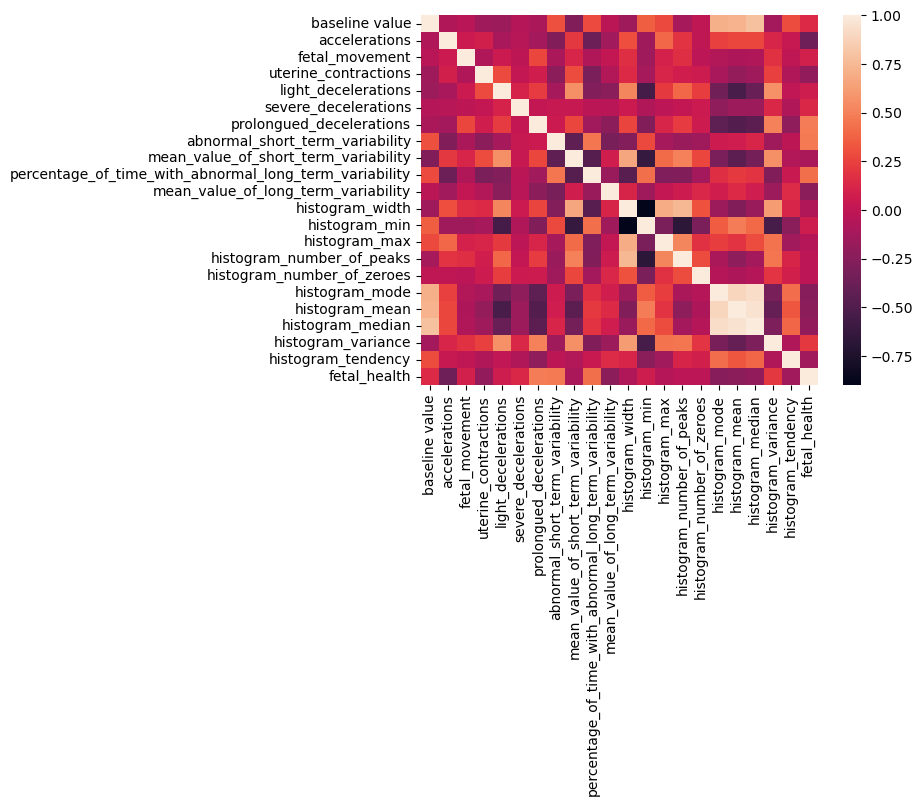

In [11]:
# Show heatmap of correlation
correlacion = df.corr()
sb.heatmap(correlacion)

In [12]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,133.304780,0.003188,0.009517,0.004387,0.001901,0.000003,0.000159,46.993848,1.335021,9.795078,...,93.564600,164.099858,4.077142,0.325603,137.454330,134.599621,138.089446,18.907241,0.318504,1.303833
std,9.837451,0.003871,0.046804,0.002941,0.002966,0.000057,0.000592,17.177782,0.884368,18.337073,...,29.562269,17.945175,2.951664,0.707771,16.402026,15.610422,14.478957,29.038766,0.611075,0.614279
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [15]:
# Plot your data to see what's in your DataFrame
df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

### Unsurpervised Learning

In [16]:
un_sup_df = df.copy()
un_sup_df.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [18]:
un_sup_df_scaled = StandardScaler().fit_transform(un_sup_df)
un_sup_df_scaled[:5]

array([[-1.35278232, -0.82377599, -0.20339237, -1.49224456, -0.64120298,
        -0.05765272, -0.26963969,  1.5142996 , -0.94442497,  1.81123687,
        -1.02398197, -0.16757727, -1.0679854 , -2.12362798, -0.7038853 ,
        -0.46014951, -1.06440891,  0.1538041 , -1.18057479,  1.86321844,
         1.1155051 ,  1.13357536],
       [-0.13266535,  0.72644399, -0.20339237,  0.54860512,  0.3706431 ,
        -0.05765272, -0.26963969, -1.74649717,  0.86520547, -0.53429448,
         0.39657882,  1.52479661, -0.86497594,  1.88954222,  0.65160309,
         0.9530713 ,  0.21622384,  0.08972916,  0.13198506, -0.23791906,
        -0.5213437 , -0.49473513],
       [-0.03098893, -0.048666  , -0.20339237,  1.22888835,  0.3706431 ,
        -0.05765272, -0.26963969, -1.80472568,  0.86520547, -0.53429448,
         0.92928912,  1.52479661, -0.86497594,  1.88954222,  0.31273099,
         0.9530713 ,  0.21622384,  0.02565423, -0.00617914, -0.20347419,
        -0.5213437 , -0.49473513],
       [ 0.07068748

In [21]:
# Create a DataFrame with the scaled data
un_sup_df_scaled_new = pd.DataFrame(
    un_sup_df_scaled, columns=un_sup_df.columns
)

#set fetal health score as index
un_sup_df_scaled_new.set_index(un_sup_df['fetal_health'], inplace=True)
un_sup_df_scaled_new.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
fetal_health,,,,,,,,,,,,,,,,,,,,,
2.0,-1.352782,-0.823776,-0.203392,-1.492245,-0.641203,-0.057653,-0.26964,1.514300,-0.944425,1.811237,...,-1.067985,-2.123628,-0.703885,-0.460150,-1.064409,0.153804,-1.180575,1.863218,1.115505,1.133575
1.0,-0.132665,0.726444,-0.203392,0.548605,0.370643,-0.057653,-0.26964,-1.746497,0.865205,-0.534294,...,-0.864976,1.889542,0.651603,0.953071,0.216224,0.089729,0.131985,-0.237919,-0.521344,-0.494735
1.0,-0.030989,-0.048666,-0.203392,1.228888,0.370643,-0.057653,-0.26964,-1.804726,0.865205,-0.534294,...,-0.864976,1.889542,0.312731,0.953071,0.216224,0.025654,-0.006179,-0.203474,-0.521344,-0.494735
1.0,0.070687,-0.048666,-0.203392,1.228888,0.370643,-0.057653,-0.26964,-1.804726,1.204511,-0.534294,...,-1.372500,0.328865,2.345964,-0.460150,-0.027706,-0.038421,-0.075261,-0.203474,1.115505,-0.494735
1.0,-0.132665,0.984814,-0.203392,1.228888,-0.641203,-0.057653,-0.26964,-1.804726,1.204511,-0.534294,...,-1.372500,0.328865,1.668219,-0.460150,-0.027706,0.089729,-0.006179,-0.272364,1.115505,-0.494735


#### Find the best value for k using scaled data


In [22]:
# Create a list with the number of k-values from 1 to 11
k_scaled = list(range(1, 11))

In [23]:
# Create an empty list to store the inertia values
inertia_scaled = []

In [25]:
for i in k_scaled:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(un_sup_df_scaled_new)
    inertia_scaled.append(model.inertia_)

In [26]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k_scaled": k_scaled,
    "inertia_scaled": inertia_scaled
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_data = pd.DataFrame(elbow_data)

In [29]:
elbow_plot_scaled = df_elbow_data.hvplot.line(x="k_scaled", y="inertia_scaled", title="Elbow Curve Using Scaled Fetal Health Data", xticks=k_scaled)
elbow_plot_scaled

:Curve   [k_scaled]   (inertia_scaled)

k = 4 seems to be the best fit for this model

#### Cluster fetal health with K-means using the scaled Data

In [30]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [31]:
# Fit the K-Means model using the scaled data
model.fit(un_sup_df_scaled_new)

KMeans(n_clusters=4)

In [32]:
# Predict the clusters to group the fetal health using the scaled data
clusters_k4 = model.predict(un_sup_df_scaled_new)

# Print the resulting array of cluster values.
print(clusters_k4)

[1 2 2 ... 3 3 3]


In [33]:
new_df = un_sup_df_scaled_new.copy()
new_df["cluster"] = clusters_k4
new_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,cluster
fetal_health,,,,,,,,,,,,,,,,,,,,,
2.0,-1.352782,-0.823776,-0.203392,-1.492245,-0.641203,-0.057653,-0.26964,1.514300,-0.944425,1.811237,...,-2.123628,-0.703885,-0.460150,-1.064409,0.153804,-1.180575,1.863218,1.115505,1.133575,1
1.0,-0.132665,0.726444,-0.203392,0.548605,0.370643,-0.057653,-0.26964,-1.746497,0.865205,-0.534294,...,1.889542,0.651603,0.953071,0.216224,0.089729,0.131985,-0.237919,-0.521344,-0.494735,2
1.0,-0.030989,-0.048666,-0.203392,1.228888,0.370643,-0.057653,-0.26964,-1.804726,0.865205,-0.534294,...,1.889542,0.312731,0.953071,0.216224,0.025654,-0.006179,-0.203474,-0.521344,-0.494735,2
1.0,0.070687,-0.048666,-0.203392,1.228888,0.370643,-0.057653,-0.26964,-1.804726,1.204511,-0.534294,...,0.328865,2.345964,-0.460150,-0.027706,-0.038421,-0.075261,-0.203474,1.115505,-0.494735,2
1.0,-0.132665,0.984814,-0.203392,1.228888,-0.641203,-0.057653,-0.26964,-1.804726,1.204511,-0.534294,...,0.328865,1.668219,-0.460150,-0.027706,0.089729,-0.006179,-0.272364,1.115505,-0.494735,2


In [43]:
new_df.hvplot.scatter(
    x = "baseline value", y = "fetal_movement", by = "cluster", 
    hover_cols = ["fetal_health"], title = "Fetal Health Clusters")

:NdOverlay   [cluster]
   :Scatter   [baseline value]   (fetal_movement,fetal_health)